In [1]:
# @author Nikhil Maserang
# @date 2023/08/12

import numpy as np
import scipy.ndimage as spnd
import matplotlib.pyplot as plt
import sxm_reader as sxm
import cv2
import utils as ut
import PIL.Image

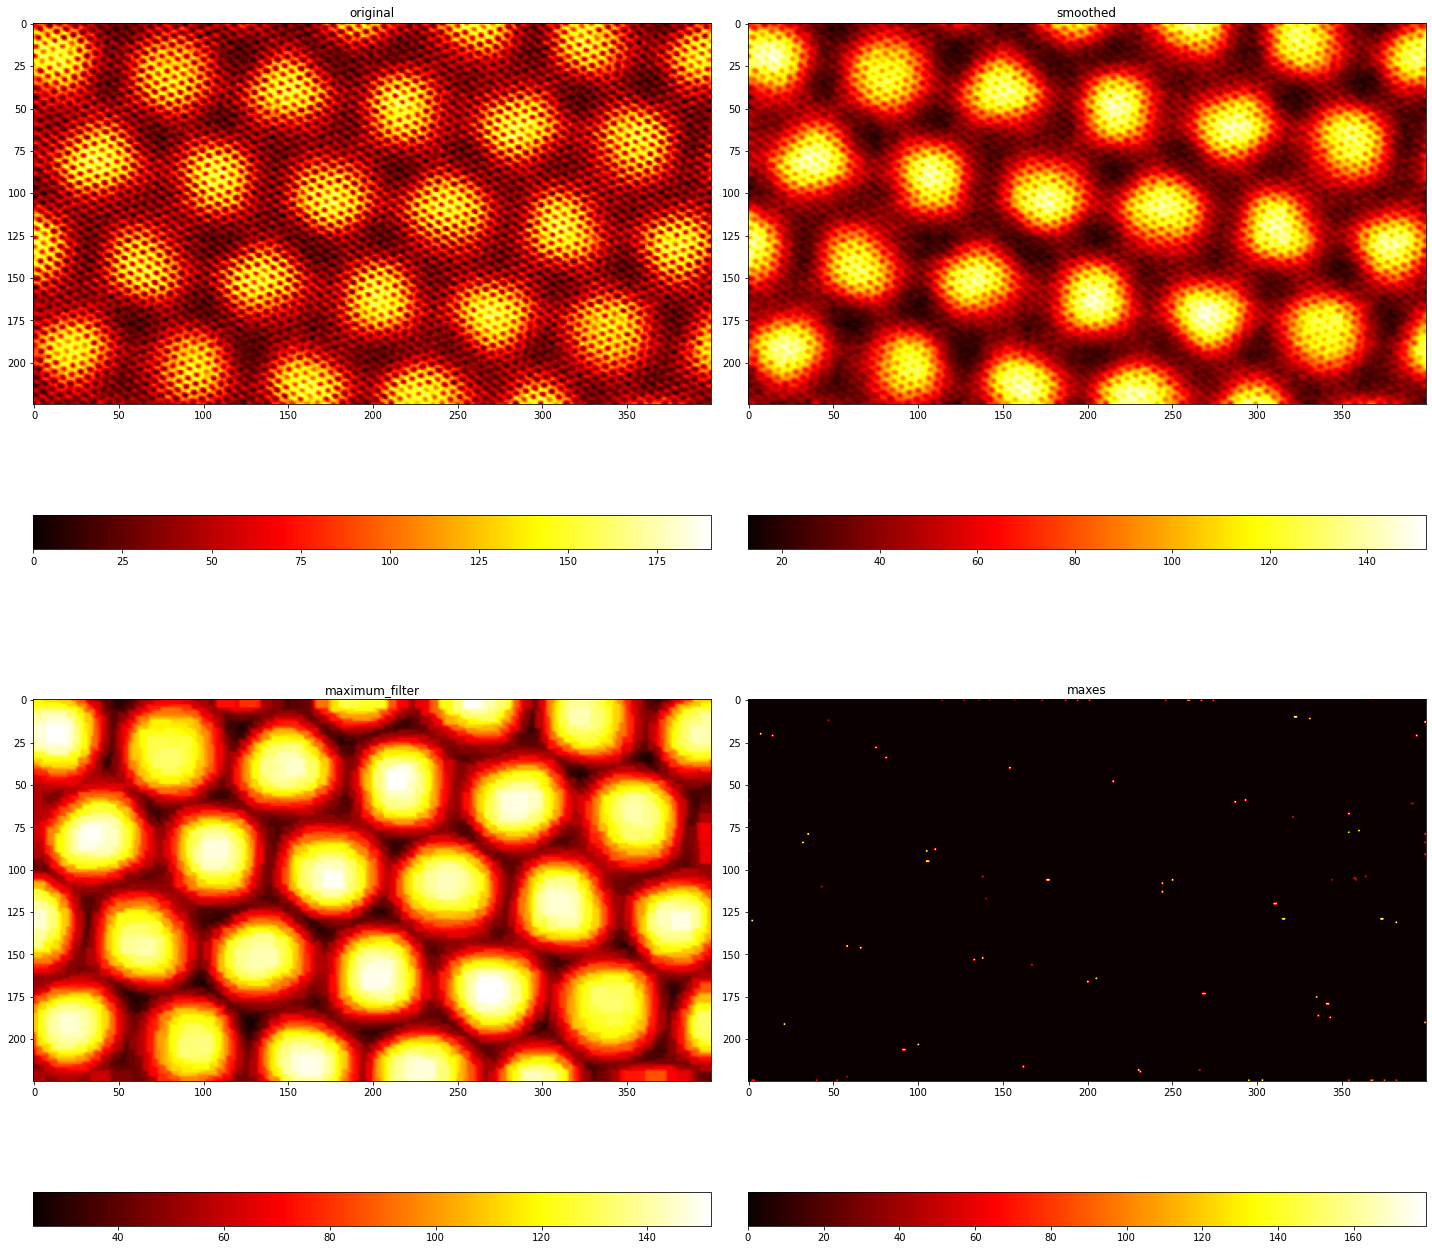

In [2]:
# get moire data
img = np.array(PIL.Image.open("moire.jpg").convert('L'))

# apply gaussian smoothing
smoothed = spnd.gaussian_filter(img, 1.2)

# apply maximum filter
dilated = spnd.grey_dilation(smoothed, 10)

# find maximums
maxes = np.where(smoothed == dilated, img, np.zeros(img.shape))

# plot everything
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20, 20), layout='tight')
axs[0, 0].set_title("original")
axs[0, 1].set_title("smoothed")
axs[1, 0].set_title("maximum_filter")
axs[1, 1].set_title("maxes")
plt.colorbar(axs[0, 0].imshow(img      , cmap="hot"), ax=axs[0, 0], location="bottom")
plt.colorbar(axs[0, 1].imshow(smoothed , cmap="hot"), ax=axs[0, 1], location="bottom")
plt.colorbar(axs[1, 0].imshow(dilated  , cmap="hot"), ax=axs[1, 0], location="bottom")
plt.colorbar(axs[1, 1].imshow(maxes    , cmap="hot"), ax=axs[1, 1], location="bottom")
plt.show()